<a href="https://colab.research.google.com/github/NatanaelSSilva/Arquivos-Mackenzie/blob/master/Anuncio_Teclas_Trilha_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install unidecode

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/NatanaelSSilva/Arquivos-Mackenzie/master/anunciosmusicacenter2.csv')

titles = df[['title']].copy()
display(df)
titles.head(10)

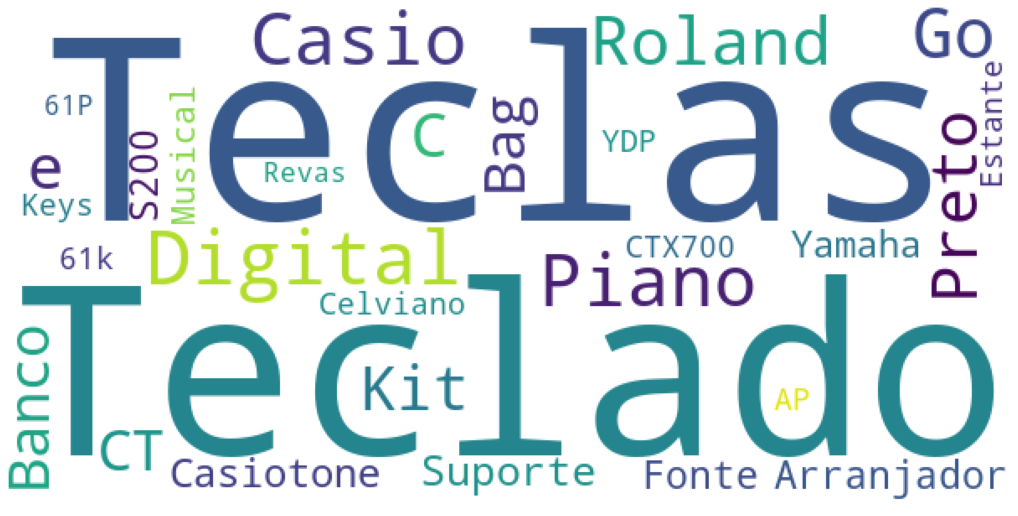

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

original_text = ' '.join(titles['title'])


wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(original_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = 'White') 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
"""
Thanks for https://simasware.wordpress.com/2014/02/28/pluralizacao-em-pt-br-rails/
"""

import re
import unicodedata
import string

INVARIAVEL = [  'lápis',
                'atlas',
                'pires',
                'ônibus',
                'vírus',
                'bônus',
                'ônus',
                'cais',
                'xis',
                'óculos',
                'ourives',
                'parabéns',
                'atras',
                'frances',
                'ingles',

            ]
def transliterate(string: str) -> str:
    # Copy from inflection Library https://github.com/jpvanhal/inflection
    """
    Replace non-ASCII characters with an ASCII approximation. If no
    approximation exists, the non-ASCII character is ignored. The string must
    be ``unicode``.
    Examples::
        >>> transliterate('älämölö')
        'alamolo'
        >>> transliterate('Ærøskøbing')
        'rskbing'
    """
    normalized = unicodedata.normalize('NFKD', string)

    return normalized.encode('ascii', 'ignore').decode('ascii')

def singularizar(PalavraOriginal):
    """ Remove acentos e deixa tudo minuscula"""
    palavra = PalavraOriginal.lower()

    for wd in INVARIAVEL:
        if transliterate(wd).lower() == palavra:
            return palavra

    """      Lista de regras, composto em tuplas de valor a ser buscado e regra de substituição    """
    rules = []

    """    Palavras terminadas em ns    """
    rules.append((r"^([a-zA-z]*)ns$", r"\1m"))

    """ Palavras terminas em r ou z luzes - luz, flores - flor, arrozes - arroz"""
    rules.append((r"^([a-zA-z]*)res$", r"\1r"))
    rules.append((r"^([a-zA-z]*)zes$", r"\1z"))
    rules.append((r"^([a-zA-z]*)ses$", r"\1s"))

    """    Palavras terminadas em ão    """
    rules.append((r"^([a-zA-z]*)oes$", r"\1ao"))
    rules.append((r"^([a-zA-z]*)aos$", r"\1ao"))
    rules.append((r"^([a-zA-z]*)aes$", r"\1ao"))

    """ Palavras regulares, casos simples: carros, arvores, aboboras"""
    rules.append((r"^([a-zA-z]*)(a|e|o|u)is$", r"\1\2l"))

    """ Palavras terminas em il  cantis - cantil """
    rules.append((r"^([a-zA-z]*)is$", r"\1il"))

    """ Palavras terminas em les  mal - males, mel - meles """
    rules.append((r"^([a-zA-z]*)les$", r"\1l"))


    """ Palavras regulares, casos simples: carros, arvores, aboboras"""
    rules.append((r"^([a-zA-z]*)(a|e|i|o|u)s$", r"\1\2"))
    
    for rule in rules:
        if re.match(rule[0], palavra) is not None:
            return re.sub(rule[0], rule[1], palavra, 1, re.IGNORECASE)
    return palavra

**Tratando os dados**

In [ ]:
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
import string
nltk.download('stopwords')

stop = stopwords.words('portuguese')
pd.DataFrame(stop).sample(20)


#Transforma em minuscula e remoção de acentos 
# def funcao_aula(conteudo_linha):
#   return len(conteudo_linha.split())


# def funcao_aula2(conteudo_linha):
#   return ' '.join([word for word in conteudo_linha.split() if word not in (stop)])
#   # lista = [word for word in conteudo_linha.split()]  
#   # print(lista)
#   # retorno = ' '.join([word for word in conteudo_linha.split() if word not in (stop)])
#   # return retorno

# titles['coluna_aula'] = titles['title'].apply(lambda sbrubles: funcao_aula(sbrubles))

# titles['coluna_aula2'] = titles['title'].apply(lambda sbrubles: ' '.join([word for word in sbrubles.split() if word not in (stop)]))

titles['title_treated'] = titles['title'].str.lower().apply(lambda x: unidecode(x))


# remocação de pontuaçao
titles['title_treated'] = titles['title_treated'].str.replace('[{}]'.format(string.punctuation), '')

# remocação de numeros
titles['title_treated'] = titles['title_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada
titles['title_treated'] = titles['title_treated'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Removendo plural
titles['title_treated'] = titles['title_treated'].apply(lambda x: ' '.join([singularizar(word) for word in x.split()]))

titles.sample(20)

**Motando as ignorewords**

In [ ]:
#ignorando lista de palvras não pertinentes

ignorewords = [ 'keys','kit','ydp','go','ap','ctx','gop','w','serie','tddmk','vermelho','ariu','eletronica','c','preto','cts','reva','rosewood','kb','ariu','tecla', 
               'marrom','lcd','tela','psrf','musical','usb','celviano','jbl','vdrums','condensad','sound','compact','ativa','digital','pol','som','one','fonte','cst',
               'bluetooth','eon','akg','ultrahd','lyra','caixa','mesa','microfone','sa','mini','baixo','acmn','michael''spb','midi','fr','carbon','samson','vermelha','longarina',
               'ex','stay','ydpr','sensitiva','case','mm','spb','saty','inclinada','michael','mk','base','torre','desmontavel','curva','bateria','launchkey','par','cor','branca',
               'bpd','selenium','arandela','teclado','redonda','keyboards','custom','casiotone']


titles['title_treated_ignored'] = titles['title_treated'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (ignorewords)]))
titles.sample(20)

**Lista de palavras final**

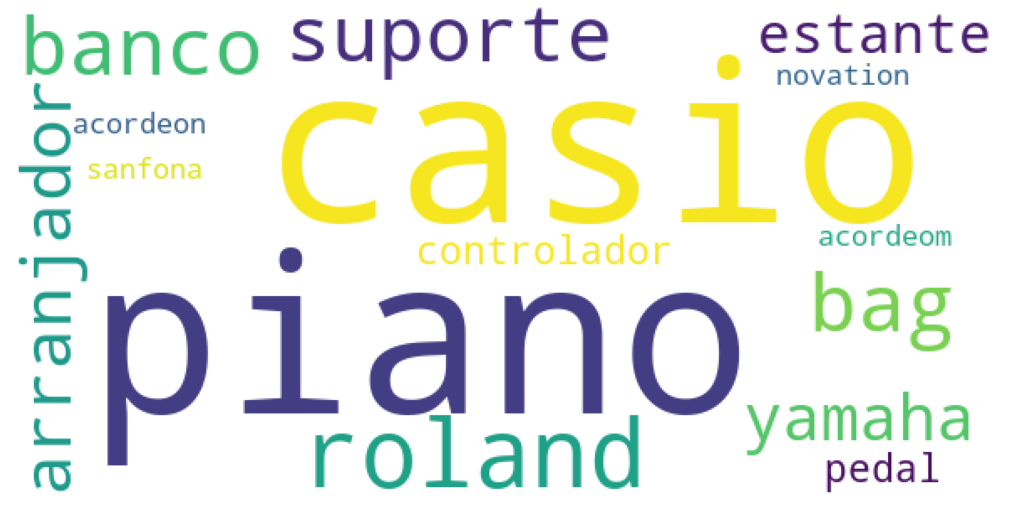

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

original_text = ' '.join(titles['title_treated_ignored'])


wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(original_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = 'White') 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()